![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
import tensorflow as tf

In [4]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


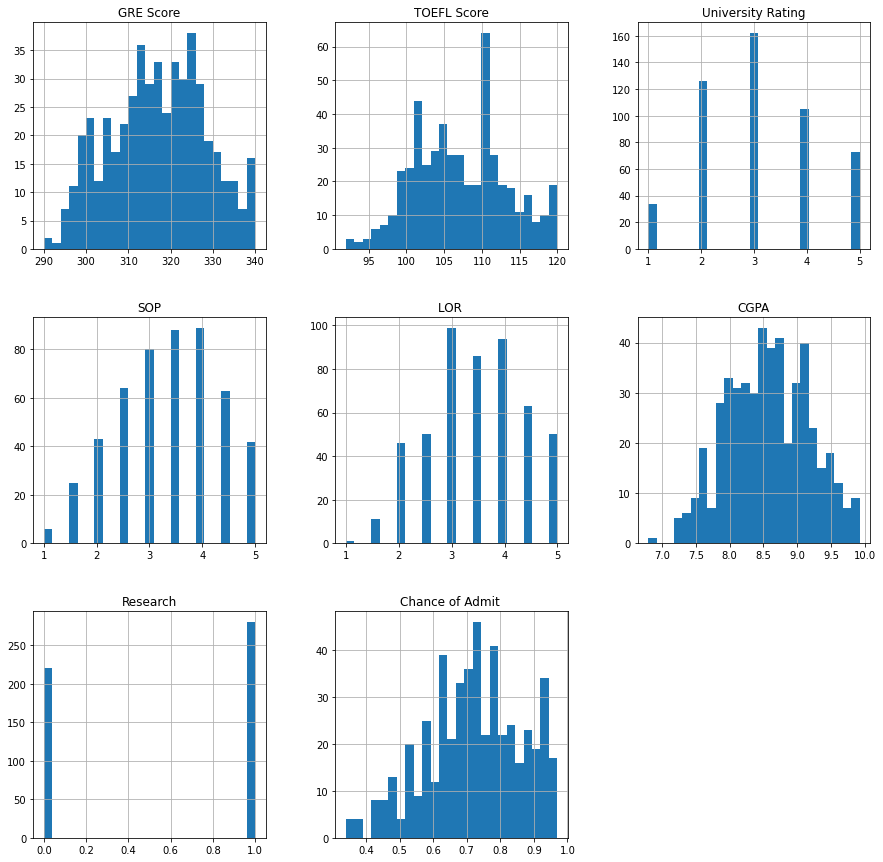

In [5]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [6]:
data = data.reset_index()
data = data.drop(data.columns[0], axis = 1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = pd.DataFrame(data.iloc[:,-1])

In [8]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [9]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
xTrain = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

# Se obtienen los datos como arrays
xTrain = np.array(xTrain)
yTrain = np.array(yTrain)

xTest = np.array(xTest)
yTest = np.array(yTest)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

### Importación de librerías

In [10]:
pip install livelossplot

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Adrián Alarcón\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [11]:
# Importación librerías
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [12]:
output_var = yTrain.shape[1]
input_var = xTrain.shape[1]

In [13]:
# Se construye la Red Neuronal de una capa.
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(input_var,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
# Definición de función de perdida.

#opt = tf.keras.optimizers.SGD(
#    learning_rate=0.0001, momentum=1, nesterov=False, name="SGD")

model.compile(optimizer='sgd', loss='mean_absolute_error')

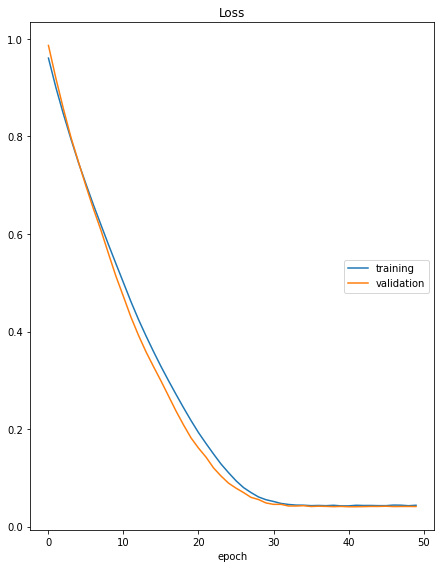

Loss
	training         	 (min:    0.043, max:    0.961, cur:    0.044)
	validation       	 (min:    0.041, max:    0.987, cur:    0.041)
11/11 [==============================] - 0s 11ms/step - loss: 0.0438 - val_loss: 0.0412


In [15]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

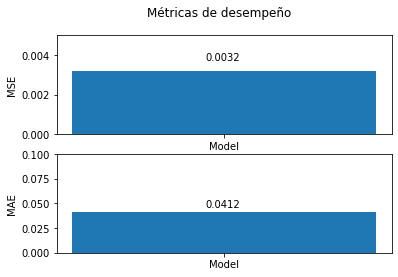

In [16]:
# Se calculan las métrics de desempeño MAE y MSE

MSE_1 = mean_squared_error(yTest, model.predict(xTest))
MAE_1 = mean_absolute_error(yTest, model.predict(xTest))


# Se genera un gráfico para comparar

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Métricas de desempeño')

#MSE
ax1.set_ylabel('MSE')
ax1.bar(x = 'Model', height = MSE_1)
ax1.set_ylim([0,0.005])
ax1.text(-0.05, MSE_1+0.0005, str(round(MSE_1,4)))

#MAE
ax2.set_ylabel('MAE')
ax2.bar(x = 'Model', height = MAE_1)
ax2.set_ylim([0,0.1])
ax2.text(-0.05, MAE_1+0.005, str(round(MAE_1,4)))

plt.show()

### Desarrollo

Se construye la red neuronal usando como función de pérdida la métrica 'mean_absolute_error' dado que se trata de un problema de regresión en el cual los valores de la variable se mueven en el rango de  [0, 1]. Por lo tanto, conviene utilizar una métrica que no eleve a una potencia >1 con el fin de lograr una mejor disminución del error de predicción.

Como optimizador se utiliza 'sgd' el cual se basa en el Gradiente Descendiente para buscar un valor mínimo de la función de costo. 

Las métricas de desempeño del modelo se pueden observar en las gráficas construidas, se obtiene un valor aceptable tanto de MSE como de MAE.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [17]:
# Celda 2

K.clear_session()

# Definición red neuronal con la función Sequential()
model2 = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
#Capa 1
model2.add(Dense(178,input_shape=(input_var,),activation='relu'))
#Capa2
model2.add(Dense(178, activation='relu'))
#Capa de salida
model2.add(Dense(output_var))
#Función de activación
model2.add(Activation('sigmoid'))

# Impresión de la arquitectura de la red neuronal
print(model2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 178)               1424      
                                                                 
 dense_1 (Dense)             (None, 178)               31862     
                                                                 
 dense_2 (Dense)             (None, 1)                 179       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 33,465
Trainable params: 33,465
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model2.compile(optimizer='sgd', loss='mean_absolute_error')

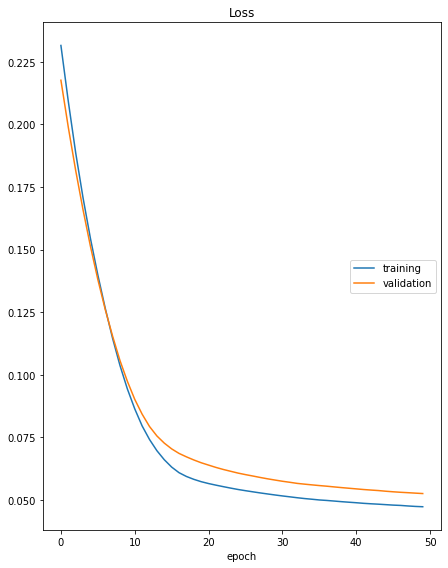

Loss
	training         	 (min:    0.047, max:    0.231, cur:    0.047)
	validation       	 (min:    0.053, max:    0.218, cur:    0.053)
11/11 [==============================] - 0s 12ms/step - loss: 0.0473 - val_loss: 0.0526


In [19]:
# Entrenamiento de la red neuronal con 50 épocas
model2.fit(xTrain, yTrain,
          validation_data = (xTest, yTest),
          epochs=50, 
          callbacks=[PlotLossesKeras()])

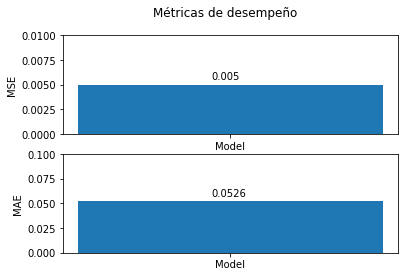

In [20]:
# Se calculan las métrics de desempeño MAE y MSE

MSE_2 = mean_squared_error(yTest, model2.predict(xTest))
MAE_2 = mean_absolute_error(yTest, model2.predict(xTest))


# Se genera un gráfico para comparar

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Métricas de desempeño')

#MSE
ax1.set_ylabel('MSE')
ax1.bar(x = 'Model', height = MSE_2)
ax1.set_ylim([0,0.01])
ax1.text(-0.05, MSE_2+0.0005, str(round(MSE_2,4)))

#MAE
ax2.set_ylabel('MAE')
ax2.bar(x = 'Model', height = MAE_2)
ax2.set_ylim([0,0.1])
ax2.text(-0.05, MAE_2+0.005, str(round(MAE_2,4)))

plt.show()

### Desarrollo

Se construye una red neuronal de dos capas ocultas usando como función de pérdida la métrica 'mean_absolute_error' y como optimizador se utiliza 'sgd'. se asigna una función 'relu' como una función de activación de cada capa y 'sigmoid' sobre la capa de predicción. 

Las métricas de desempeño del modelo se pueden observar en las gráficas construidas, donde se observa que se obtiene un valor de MAE superio que con el modelo de una sola capa.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [21]:
# Celda 3

# Importación librerías
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [22]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model3 = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
#Capa 1
model3.add(Dense(160,input_shape=(input_var,),activation='relu'))
#Capa2
model3.add(Dense(80, activation='relu'))
#Capa3
model3.add(Dense(40, activation='relu'))
#Capa de salida
model3.add(Dense(output_var))
#Función de activación
model3.add(Activation('sigmoid'))

model3.compile(optimizer='sgd', loss='mean_absolute_error')

# Impresión de la arquitectura de la red neuronal
print(model3.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1280      
                                                                 
 dense_1 (Dense)             (None, 80)                12880     
                                                                 
 dense_2 (Dense)             (None, 40)                3240      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 17,441
Trainable params: 17,441
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

In [24]:
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

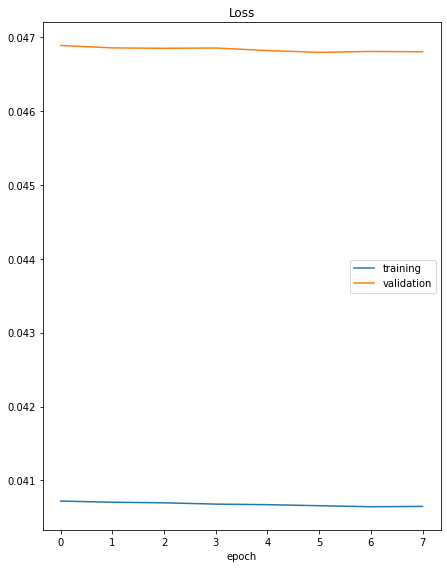

Loss
	training         	 (min:    0.041, max:    0.041, cur:    0.041)
	validation       	 (min:    0.047, max:    0.047, cur:    0.047)
3/3 [==============================] - 0s 57ms/step - loss: 0.0406 - val_loss: 0.0468
Epoch 8: early stopping


In [31]:
# Entrenamiento de la red neuronal con 50 épocas y early stopping
model3.fit(xTrain, yTrain, 
          verbose=True, 
          epochs=50, 
          batch_size=128,
          validation_data=(xTest,yTest),
          callbacks=[best_model, early_stop, PlotLossesKeras()])

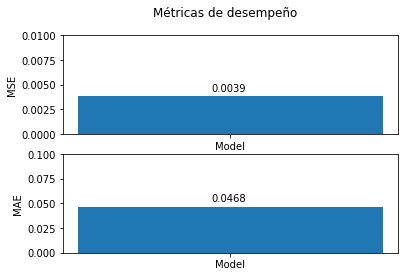

In [32]:
# Se calculan las métrics de desempeño MAE y MSE

MSE_3 = mean_squared_error(yTest, model3.predict(xTest))
MAE_3 = mean_absolute_error(yTest, model3.predict(xTest))


# Se genera un gráfico para comparar

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Métricas de desempeño')

#MSE
ax1.set_ylabel('MSE')
ax1.bar(x = 'Model', height = MSE_3)
ax1.set_ylim([0,0.01])
ax1.text(-0.05, MSE_3+0.0005, str(round(MSE_3,4)))

#MAE
ax2.set_ylabel('MAE')
ax2.bar(x = 'Model', height = MAE_3)
ax2.set_ylim([0,0.1])
ax2.text(-0.05, MAE_3+0.005, str(round(MAE_3,4)))

plt.show()

### Desarrollo

Se construye una red neuronal con tres capas ocultas usando como función de pérdida la métrica 'mean_absolute_error' y como optimizador se utiliza 'sgd'. se asigna una función 'relu' como una función de activación de cada capa y 'sigmoid' sobre la capa de predicción.

Se establece un Early_stopper, el cual se ha parametrizado para detener el entrenamiento del modelo una vez en dos epocs seguidos se tenga el mismo valor en la función de pérdida, donde se identifica que el modelo se estabiliza tras 33 épocs ( inicialmente se habían definido 50 épocs), con un valor de 0.0469 en la métrica de desempeño MAE respecto a la muestra de Test.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

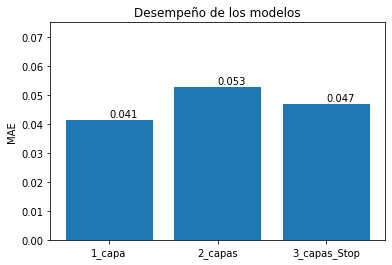

In [33]:
# Celda 4

# Se construye un DF con la información que se quiere graficar
modelo_i= ['1_capa', '2_capas', '3_capas_Stop']
MAE_i= [MAE_1, MAE_2, MAE_3]

DF_mod = pd.DataFrame( MAE_i, index = modelo_i , columns = ['MAE'])

# Se genera un gráfico para comparar

plt.bar(x = DF_mod.index, height = DF_mod.MAE)
plt.ylim(0, 0.075)
plt.ylabel('MAE')
plt.title('Desempeño de los modelos')

for a,b in zip(DF_mod.index, DF_mod.MAE): 
    plt.text(a, b+0.001, str(round(b,3)))

plt.show()

### Desarrollo

Se realiza un comparativo entre el desempeño obtenido para cada una de las redes neuronales construidas. Se evidencia que la red con mayor desempeño predictivo en la muestra de test evaluada es aquel que cuenta con una única capa, el cual presenta un MAE de 0.041, comparado con el 0.053 y 0.047 de los modelos de 2 capas y EarlyStop.

Esto permite sospechar que no hay una relación directa entre el número de capas con la que se construye la red neuronal y el desempeño del modelo, en este orden de ideas, es necesario configurar diferentes hiperparámetros para obtener un modelo con mayor desemepño, entre estos se inluyen: 'learning rate', 'momentum' del 'optimizer',así como el 'número de capas', 'número de parámetros', 'funciones de activación' a la hora de definir la arquitectura de la red neuronal.

Algo interesante que se puede observar es la función de pérdida. En la red con una sola neurona se evidencia que la pérdida es mayor a la que se observa en la red multicapa. La menor pérdida se da en la red con earlystop. Esto podría evidenciar que, aunque el modelo de múltiples capas es más complejo, lo que se evidencia en la función de pérdida, no siempre tiene una mejor capacidad predictiva, debido a la comparativa en MAE y MSE. Esto, en conclusión, podría indicar que no siempre un modelo más complejo tiene una mayor capacidad predictiva.